In [1]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as mt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
sns.set()
import zipfile
from sklearn.svm import SVC

In [2]:
with zipfile.ZipFile("C:/Users/Harshit/Downloads/Decision Tree.zip") as x:
    with x.open("Heart Disease Prediction/Dataset/Dataset/HeartDisease.csv") as v:
        fd = ps.read_csv(v)

In [3]:
fd

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
fd.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
fd.isnull().sum()/len(fd)*100

age                    0.0
gender                 0.0
chest_pain             0.0
rest_bps               0.0
cholestrol             0.0
fasting_blood_sugar    0.0
rest_ecg               0.0
thalach                0.0
exer_angina            0.0
old_peak               0.0
slope                  0.0
ca                     0.0
thalassemia            0.0
target                 0.0
dtype: float64

In [6]:
for x in fd:
    print(fd[x].value_counts())

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
1    207
0     96
Name: gender, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name:

In [7]:
fd.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [8]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='Count'>

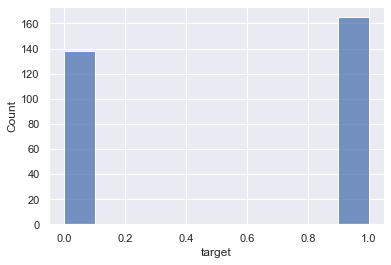

In [9]:
sns.histplot(data=fd,x="target")

In [10]:
fd.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [14]:
# Putting feature variable to X
X = fd.drop('target',axis=1)

# Putting response variable to y
y = fd['target']

In [15]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [16]:
X_test.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [17]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        32
           1       0.88      0.76      0.82        59

    accuracy                           0.78        91
   macro avg       0.77      0.79      0.77        91
weighted avg       0.80      0.78      0.78        91



In [19]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[26  6]
 [14 45]]
0.7802197802197802


In [20]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [21]:
#  Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(fd.columns[1:])
features

['gender',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia',
 'target']

In [22]:
import graphviz

In [23]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Harshit\anaconda3\Lib\site-packages\graphviz'

In [24]:
import graphviz
from graphviz import Digraph
import pydotplus

In [25]:
# conda install graphviz

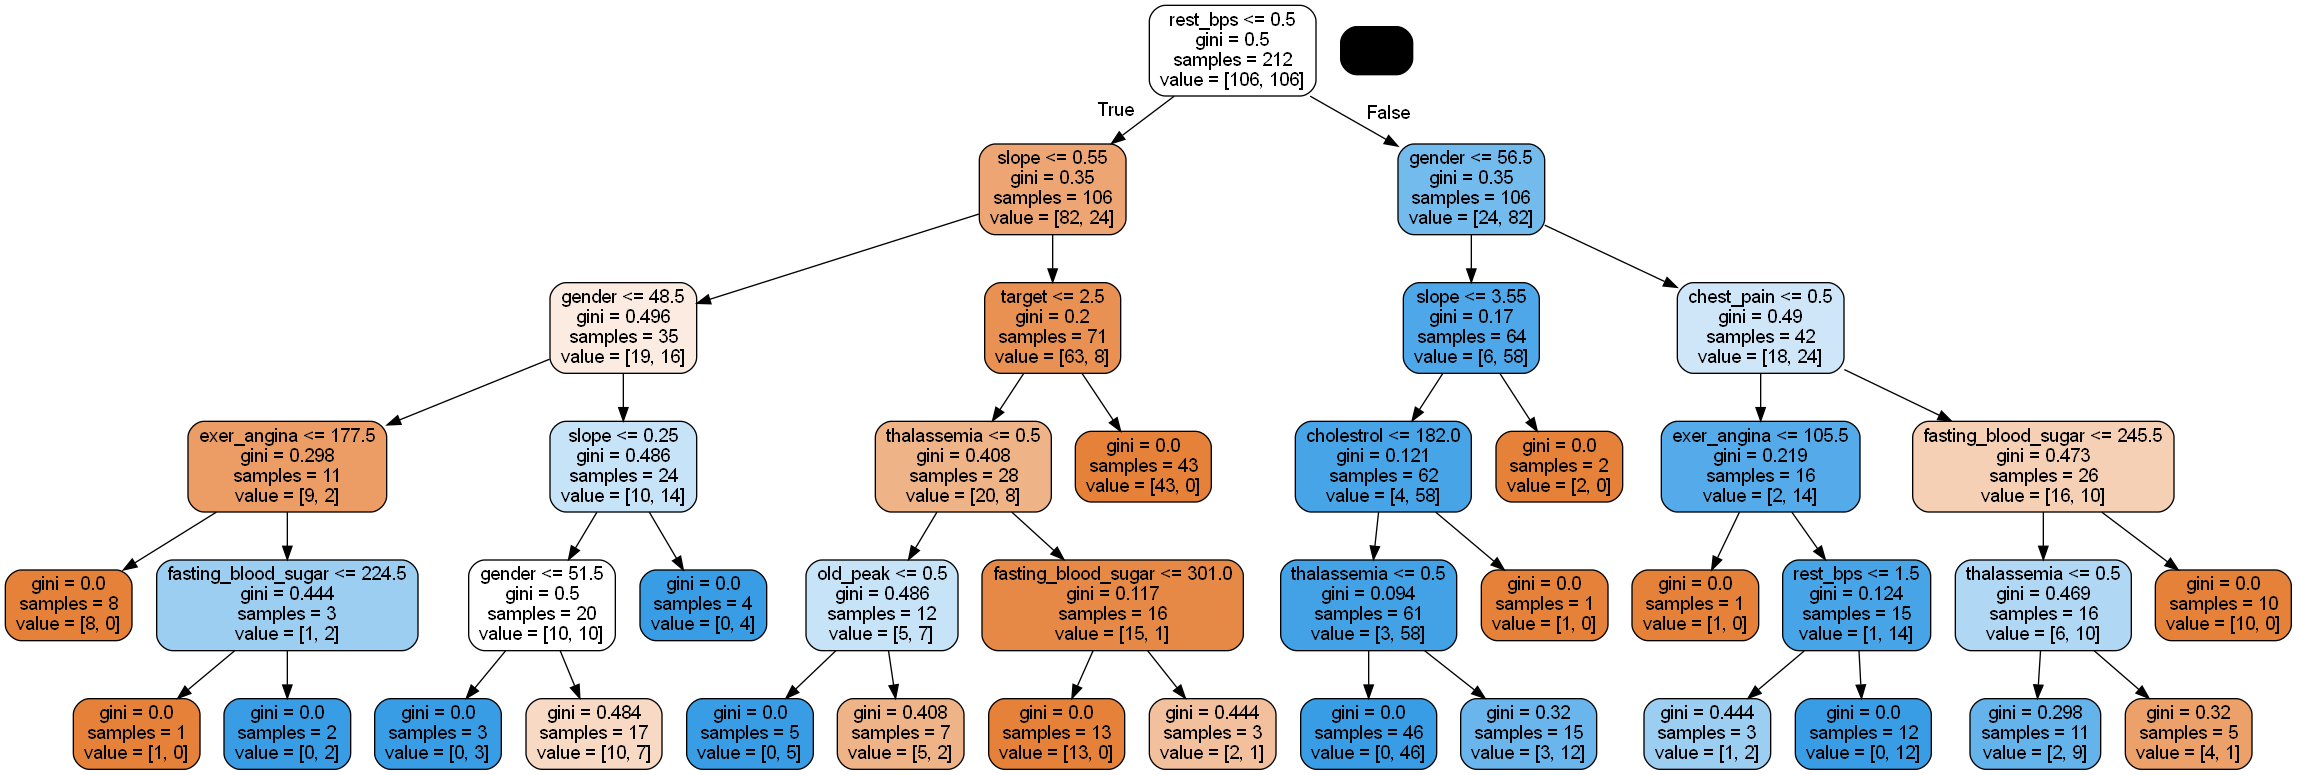

In [26]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [28]:
# scores of GridSearch CV
scores = tree.cv_results_
ps.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003994,0.001117,0.002181,0.000407,1,{'max_depth': 1},0.720930,0.720930,0.785714,0.857143,...,0.774086,0.050636,1,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
1,0.002191,0.001154,0.001195,0.000390,2,{'max_depth': 2},0.674419,0.674419,0.785714,0.738095,...,0.731672,0.049876,38,0.804734,0.804734,0.770588,0.764706,0.770588,0.783070,0.017818
2,0.001980,0.000617,0.001803,0.000754,3,{'max_depth': 3},0.627907,0.744186,0.690476,0.738095,...,0.702990,0.042074,39,0.863905,0.857988,0.888235,0.835294,0.829412,0.854967,0.021147
3,0.002400,0.000497,0.001399,0.000492,4,{'max_depth': 4},0.651163,0.744186,0.738095,0.785714,...,0.736213,0.045631,37,0.911243,0.893491,0.917647,0.888235,0.900000,0.902123,0.010918
4,0.002586,0.000485,0.001202,0.000410,5,{'max_depth': 5},0.627907,0.767442,0.761905,0.833333,...,0.764784,0.075032,2,0.952663,0.964497,0.970588,0.923529,0.929412,0.948138,0.018700


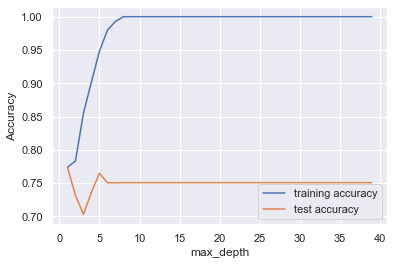

In [29]:
# plotting accuracies with max_depth
mt.figure()
mt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
mt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
mt.xlabel("max_depth")
mt.ylabel("Accuracy")
mt.legend()
mt.show()

In [31]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [32]:
# scores of GridSearch CV
scores = tree.cv_results_
ps.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003295,0.000873,0.001795,3.992129e-04,5,{'min_samples_leaf': 5},0.651163,0.790698,0.785714,0.833333,...,0.778848,0.066975,1,0.893491,0.887574,0.894118,0.888235,0.882353,0.889154,0.004314
1,0.001596,0.000489,0.000997,4.422006e-07,25,{'min_samples_leaf': 25},0.720930,0.720930,0.785714,0.738095,...,0.750277,0.029606,4,0.786982,0.786982,0.770588,0.764706,0.770588,0.775969,0.009245
2,0.001396,0.000489,0.001000,4.482269e-06,45,{'min_samples_leaf': 45},0.720930,0.720930,0.785714,0.857143,...,0.774086,0.050636,2,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
3,0.001397,0.000488,0.000798,3.988743e-04,65,{'min_samples_leaf': 65},0.720930,0.720930,0.785714,0.857143,...,0.774086,0.050636,2,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
4,0.001397,0.000488,0.001098,2.046623e-04,85,{'min_samples_leaf': 85},0.488372,0.488372,0.571429,0.857143,...,0.623920,0.142871,5,0.502959,0.502959,0.576471,0.752941,0.682353,0.603536,0.099497


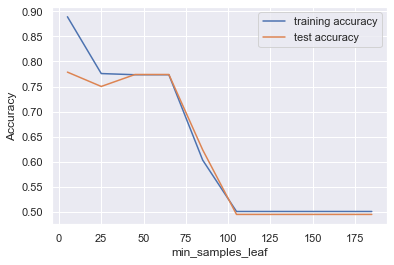

In [33]:
# plotting accuracies with min_samples_leaf
mt.figure()
mt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
mt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
mt.xlabel("min_samples_leaf")
mt.ylabel("Accuracy")
mt.legend()
mt.show()

In [34]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
ps.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002786,0.000396,0.001609,4.996282e-04,5,{'min_samples_split': 5},0.627907,0.813953,0.714286,0.785714,...,0.759801,0.080681,5,0.976331,0.982249,0.976471,0.964706,0.952941,0.970540,0.010484
1,0.002394,0.000489,0.001196,3.984929e-04,25,{'min_samples_split': 25},0.627907,0.697674,0.690476,0.761905,...,0.698450,0.043169,9,0.846154,0.840237,0.888235,0.841176,0.829412,0.849043,0.020343
2,0.001596,0.000488,0.000997,4.672031e-07,45,{'min_samples_split': 45},0.651163,0.674419,0.785714,0.761905,...,0.731783,0.057471,7,0.816568,0.804734,0.788235,0.776471,0.782353,0.793672,0.014833
3,0.001396,0.000489,0.000998,2.276866e-06,65,{'min_samples_split': 65},0.674419,0.674419,0.785714,0.738095,...,0.731672,0.049876,8,0.804734,0.804734,0.770588,0.764706,0.770588,0.783070,0.017818
4,0.001459,0.000452,0.000997,6.843901e-07,85,{'min_samples_split': 85},0.720930,0.674419,0.785714,0.738095,...,0.740975,0.042055,6,0.786982,0.804734,0.770588,0.764706,0.770588,0.779520,0.014632


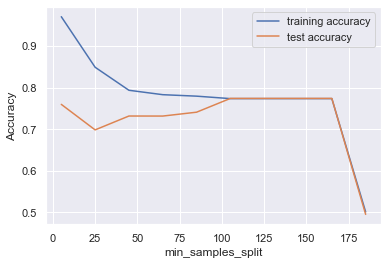

In [36]:
# plotting accuracies with min_samples_leaf
mt.figure()
mt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
mt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
mt.xlabel("min_samples_split")
mt.ylabel("Accuracy")
mt.legend()
mt.show()

In [37]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [38]:
# cv results
cv_results = ps.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002392,0.000497,0.001789,0.000396,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
1,0.001804,0.000403,0.001194,0.000396,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
2,0.001392,0.000482,0.001003,0.000012,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
3,0.001401,0.000483,0.000992,0.000622,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
4,0.001203,0.000396,0.001003,0.000013,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
5,0.000799,0.000399,0.001104,0.000215,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
6,0.001196,0.000397,0.000998,0.000002,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
7,0.001203,0.000410,0.000992,0.000622,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
8,0.001396,0.000488,0.012082,0.021901,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
9,0.001203,0.000396,0.000798,0.000399,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1


In [39]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

best accuracy 0.7740863787375415
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [40]:
# accuracy score
clf_gini.score(X_test,y_test)

0.7252747252747253

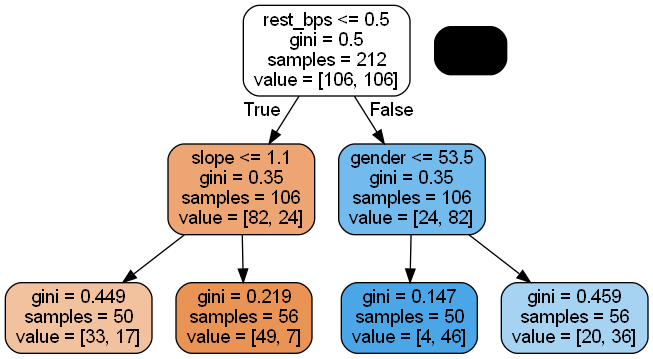

In [41]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.7252747252747253


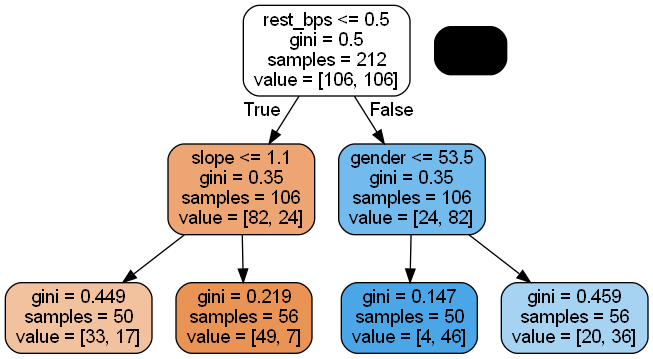

In [43]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [44]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64        32
           1       0.81      0.75      0.78        59

    accuracy                           0.73        91
   macro avg       0.70      0.72      0.71        91
weighted avg       0.74      0.73      0.73        91



In [45]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[22 10]
 [15 44]]
